In [40]:
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score, recall_score, f1_score, accuracy_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json

In [26]:
df = pd.read_csv('result copy.csv', index_col=0)
df.head(10)

,comment,Validated_Labels,Predicted_labels
0,i think there needs to be an expansion. one qu...,dissatisfied,dissatisfied
1,not too sure. don't have a ton of exposure to ...,neutral,neutral
2,i have looked at group counseling but they are...,dissatisfied,dissatisfied
3,not much in my opinion i’d working well. i thi...,dissatisfied,dissatisfied
4,the group sessions for stress relief and medit...,satisfied,mixed
5,i am a fully online student and i wish i was a...,dissatisfied,dissatisfied
6,access to counselors is simple (from my experi...,mixed,mixed
7,the counseling center is just burdened with th...,dissatisfied,dissatisfied
8,"i believe that for many, the addition of havin...",satisfied,satisfied
9,many students base assumptions on all staff ba...,dissatisfied,dissatisfied


In [27]:
df.columns
df.shape

(334, 3)

In [28]:
labels = ["satisfied","dissatisfied", "neutral", "mixed"]

In [30]:
filtered_df = df[df["Predicted_labels"].isin(labels)]
filtered_df['Predicted_labels']

0      dissatisfied
1           neutral
2      dissatisfied
3      dissatisfied
4             mixed
           ...     
329           mixed
330       satisfied
331    dissatisfied
332         neutral
333           mixed
Name: Predicted_labels, Length: 332, dtype: object

In [47]:
error = df[~df["Predicted_labels"].isin(labels)]
error_dict = error['Predicted_labels'].to_dict()

# Pretty-print as JSON
pretty_json = json.dumps(error_dict, indent=4, ensure_ascii=False)

print(pretty_json)


{
    "176": "the student's response can be broken down as follows:\n\n1.  **positive/satisfied:** \"we had two days for drop-in counseling... this helped me learn about some resources for myself.\" this is a clear expression of satisfaction with a specific service.\n2.  **dissatisfaction/suggestions for improvement:** \"i have heard from other students that there can be long wait times to meet with counselors and they're more a short-term solution (e.g., referring students to other therapists).\" these are specific criticisms and suggestions for enhancement, even if based on others' experiences.\n3.  **neutral/positive outlook:** \"there is a new telehealth counseling service which i don't know much about but it seems to address these problems.\" while not direct satisfaction with a currently working service, this statement acknowledges a new service that is perceived as a positive step to address the previously mentioned issues. it balances the prior negative feedback.\n\nwhen weighi

In [86]:
error[["Predicted_labels", "Validated_Labels"]].to_csv("error.csv")

In [100]:

def compute_confusion_matrix(y_actual, y_predicted):
    labels = y_actual.unique()
    cm = confusion_matrix(y_actual, y_predicted, labels=labels)
    # C[i, j] = no of examples in group i predicted as group j so i = y-axis = actual, j = x-axis = predicted
    cm_df = pd.DataFrame(
        cm,
        index=[f"{x}" for x in labels],  # actual
        columns=[f"{x}" for x in labels],  # predicted
    )
    cm_norm = confusion_matrix(y_actual, y_predicted, labels=labels, normalize="true")
    cm_norm_df = pd.DataFrame(
        cm_norm * 100,
        index=[f"{x}" for x in labels],
        columns=[f"{x}" for x in labels],
    )
    return cm_df, cm_norm_df, labels


def compute_classification_report(y_actual, y_predicted):
    print("Classification Report:")
    report = classification_report(y_actual, y_predicted, digits=3)
    print(report)
    
    compute_overall_metrics(y_actual, y_predicted)
    
    
    # report = classification_report(y_actual, y_predicted, digits=2, output_dict=True)

    # df_report = pd.DataFrame(report).T
    # print(df_report)
    # overall_metrics = {
    #     "accuracy": report["accuracy"],
    #     "macro_precision": report["macro avg"]["precision"],
    #     "macro_recall": report["macro avg"]["recall"],
    #     "macro_f1": report["macro avg"]["f1-score"],
    #     "weighted_precision": report["weighted avg"]["precision"],
    #     "weighted_recall": report["weighted avg"]["recall"],
    #     "weighted_f1": report["weighted avg"]["f1-score"],
    # }

    # # Display nicely
    # for k, v in overall_metrics.items():
    #     print(f"{k:20s}: {v:.3f}")
    return report


def compute_overall_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision_macro = precision_score(y_true, y_pred, average='macro')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    f1_macro = f1_score(y_true, y_pred, average='macro')

    precision_weighted = precision_score(y_true, y_pred, average='weighted')
    recall_weighted = recall_score(y_true, y_pred, average='weighted')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')

    # Display results
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Macro Precision: {precision_macro:.3f}")
    print(f"Macro Recall: {recall_macro:.3f}")
    print(f"Macro F1: {f1_macro:.3f}")
    print(f"Weighted Precision: {precision_weighted:.3f}")
    print(f"Weighted Recall: {recall_weighted:.3f}")
    print(f"Weighted F1: {f1_weighted:.3f}")

def plot_confusion_matrix(
    cm_df, x_label="Predicted", y_label="Actual", title="Confusion Matrix"
):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm_df,
        annot=True,
        fmt=".1f",
        cmap="Blues",
    )
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.tight_layout()
    plt.show()



def run_analysis(df):
    cm_count, cm_norm, _ = compute_confusion_matrix(
        df["Validated_Labels"], df["Predicted_labels"]
    )
    print("Confusion Matrix -Count \n", cm_count)
    print("\n")
    print("Confusion Matrix (Normalized) \n", cm_norm)
    plot_confusion_matrix(cm_count)
    plot_confusion_matrix(cm_norm, title="Confusion Matrix (Normalized)")
    report = compute_classification_report(df["Validated_Labels"], df["Predicted_labels"])


Confusion Matrix -Count 
               dissatisfied  neutral  satisfied  mixed
dissatisfied           124        5          2     22
neutral                  8       19          3      4
satisfied                5        4         35      5
mixed                   16        2          3     75


Confusion Matrix (Normalized) 
               dissatisfied    neutral  satisfied      mixed
dissatisfied     81.045752   3.267974   1.307190  14.379085
neutral          23.529412  55.882353   8.823529  11.764706
satisfied        10.204082   8.163265  71.428571  10.204082
mixed            16.666667   2.083333   3.125000  78.125000


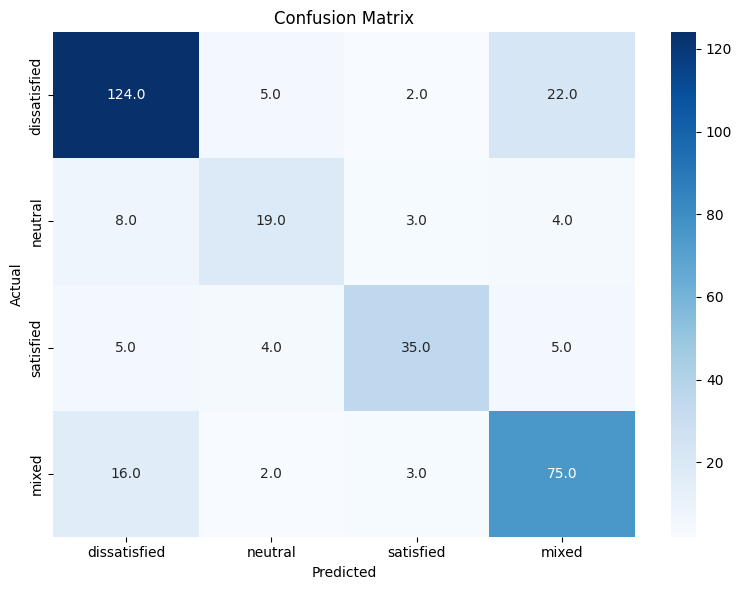

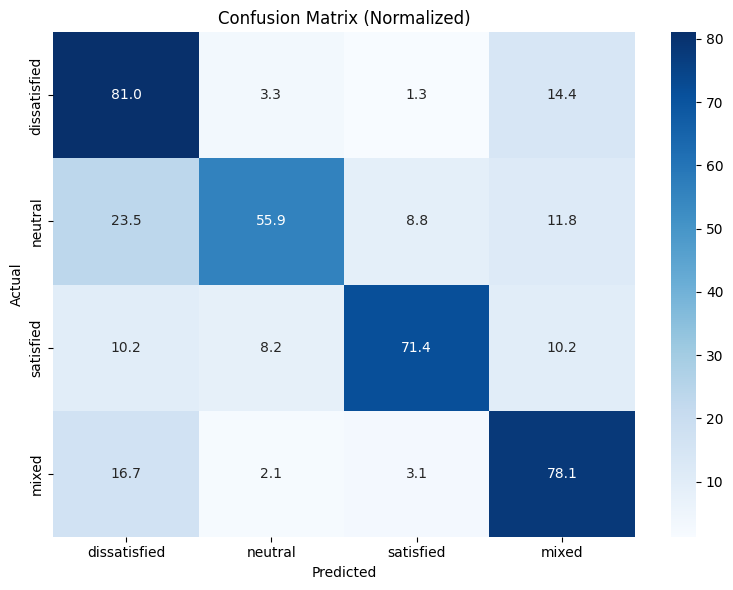

Classification Report:
              precision    recall  f1-score   support

dissatisfied      0.810     0.810     0.810       153
       mixed      0.708     0.781     0.743        96
     neutral      0.633     0.559     0.594        34
   satisfied      0.814     0.714     0.761        49

    accuracy                          0.762       332
   macro avg      0.741     0.716     0.727       332
weighted avg      0.763     0.762     0.761       332

Accuracy: 0.762
Macro Precision: 0.741
Macro Recall: 0.716
Macro F1: 0.727
Weighted Precision: 0.763
Weighted Recall: 0.762
Weighted F1: 0.761


In [101]:
run_analysis(filtered_df)